In [47]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt
from datetime import date
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.inspection import inspect


In [48]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [49]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [50]:
#Measurement column names code from https://stackoverflow.com/questions/6039342/how-to-print-all-columns-in-sqlalchemy-orm
columns = [column.name for column in inspect(Station).c]
table = inspect(Station)
for column in table.c:
    print (column.name)

id
station
name
latitude
longitude
elevation


In [51]:
#Measurement column names code from https://stackoverflow.com/questions/6039342/how-to-print-all-columns-in-sqlalchemy-orm
columns = [column.name for column in inspect(Measurement).c]
table = inspect(Measurement)
for column in table.c:
    print (column.name)

id
station
date
prcp
tobs


## D1: Determine the Summary Statistics for June

In [76]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. code source https://stackoverflow.com/questions/11616260/how-to-get-all-objects-with-a-date-that-fall-in-a-specific-month-sqlalchemy/31641488
# 3. Convert the June temperatures to a list.

June_temp = []
June_temp = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)== 6).all()                                            

In [77]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df_june = pd.DataFrame(June_temp)

,0,1
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0


In [78]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df_june.describe()

,1
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [80]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
# 7. Convert the December temperatures to a list.

Dec_temp = []
Dec_temp = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)== 12).all()                                            

In [84]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df_dec = pd.DataFrame(Dec_temp, columns=['Dates', 'Temperature'])

In [85]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df_dec.describe()

,Temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<AxesSubplot:ylabel='Frequency'>

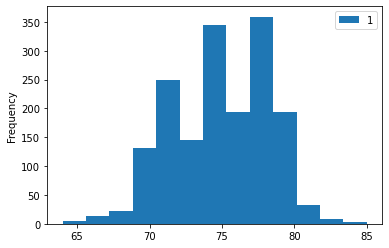

In [92]:
df_june.plot.hist(bins=13)

<AxesSubplot:ylabel='Frequency'>

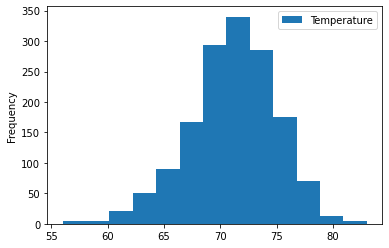

In [93]:
df_dec.plot.hist(bins=13)